In [27]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## Get Daily data

In [2]:
! wget https://covidtracking.com/api/states.csv --no-check-certificate

--2020-03-20 10:39:03--  https://covidtracking.com/api/states.csv
Resolving covidtracking.com (covidtracking.com)... 2604:a880:400:d1::888:7001, 192.81.212.192
Connecting to covidtracking.com (covidtracking.com)|2604:a880:400:d1::888:7001|:443... connected.
  Unable to locally verify the issuer's authority.
HTTP request sent, awaiting response... 200 OK
Cookie coming from covidtracking.com attempted to set domain to cape.io
Length: 2312 (2.3K) [text/csv]
Saving to: ‘states.csv’

states.csv          100%[===================>]   2.26K  --.-KB/s    in 0s      

2020-03-20 10:39:03 (50.1 MB/s) - ‘states.csv’ saved [2312/2312]



In [5]:
! wget http://covidtracking.com/api/states/daily.csv --no-check-certificate

--2020-03-20 10:39:52--  http://covidtracking.com/api/states/daily.csv
Resolving covidtracking.com (covidtracking.com)... 2604:a880:400:d1::888:7001, 104.248.60.43
Connecting to covidtracking.com (covidtracking.com)|2604:a880:400:d1::888:7001|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34179 (33K) [text/csv]
Saving to: ‘daily.csv’

daily.csv           100%[===================>]  33.38K  --.-KB/s    in 0.03s   

2020-03-20 10:39:52 (995 KB/s) - ‘daily.csv’ saved [34179/34179]



In [74]:
states = pd.read_csv('states.csv')
daily = pd.read_csv('daily.csv')
daily['date']= pd.to_datetime(daily['date'],format='%Y%m%d')
daily = daily[daily['state']!='AS']
# remove territories
states = states[states['state']!='AS']
states = states[states['state']!='MP']
states = states[states['state']!='GU']
states = states[states['state']!='PR']
states = states[states['state']!='VI']

In [75]:
dates = np.sort(daily['date'].unique())

Total number of positive cases over all states

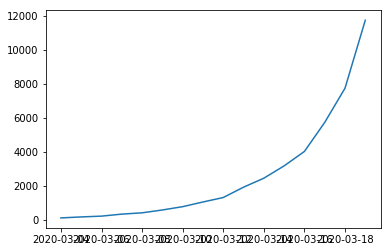

In [76]:
plt.plot(dates, daily.groupby('date')['positive'].sum())

In [94]:
len(np.sort(daily['date'].unique()))

16

Number of cases, normalized (divide by the largest # of cases in each state), with linear (slope = 1) line for reference

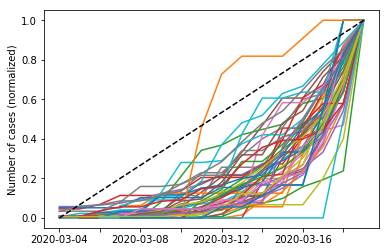

In [102]:
state_list = states['state']
fig, ax = plt.subplots()
for state in state_list:
    S =daily[daily['state'] == state]
    
    plt.plot(S['date'],S['positive']/max(S['positive']))#,S['date'],S['negative'],S['date'],S['total'])
    plt.ylabel('Number of cases (normalized)')
    every_nth = 2
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)
plt.plot(np.sort(daily['date'].unique()),[r/15 for r in range(0,16)],linestyle='dashed',color='black')
plt.show()

Visualize each state

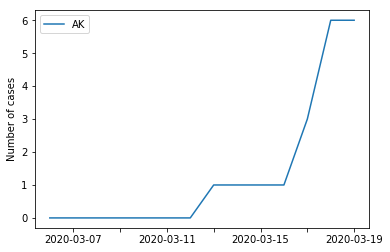

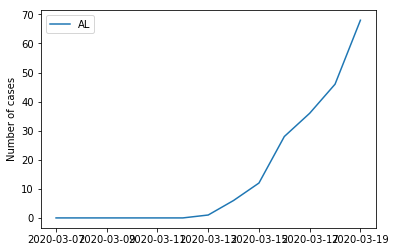

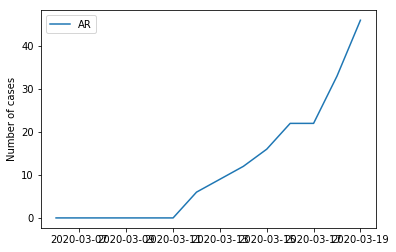

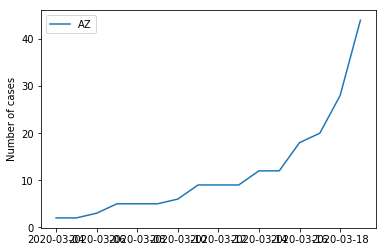

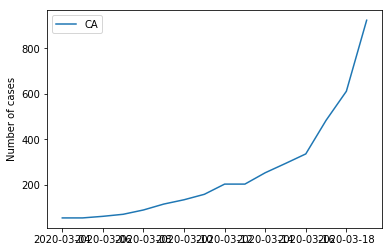

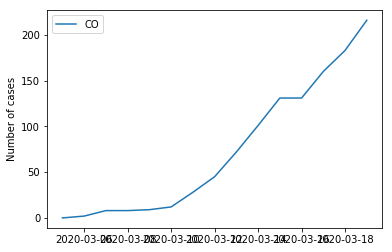

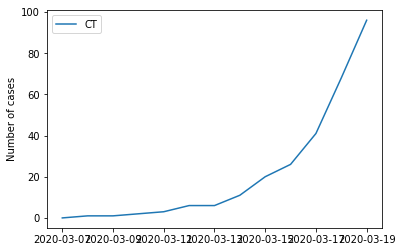

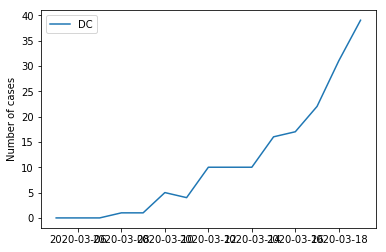

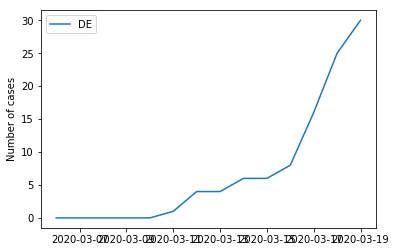

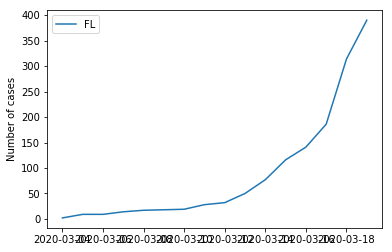

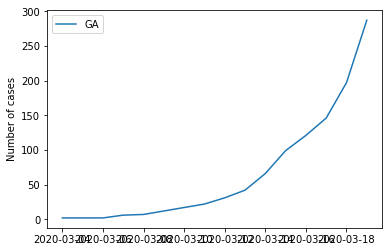

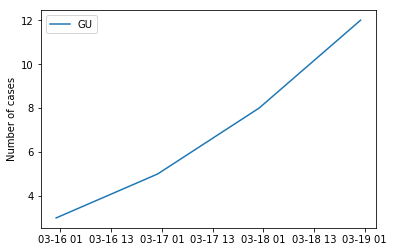

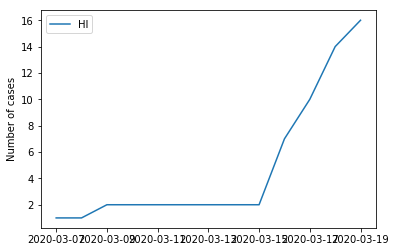

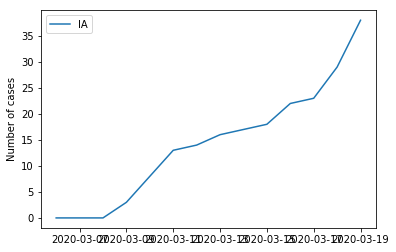

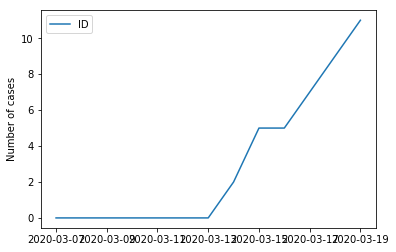

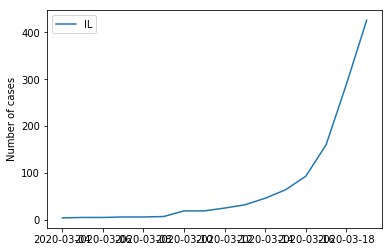

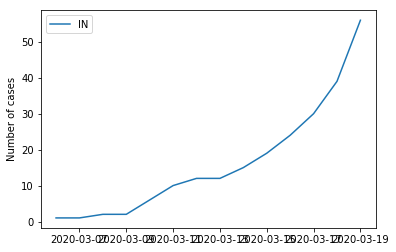

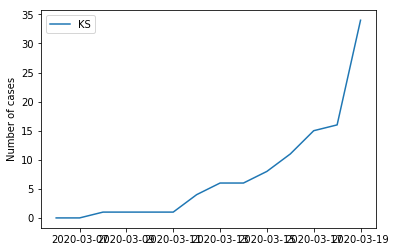

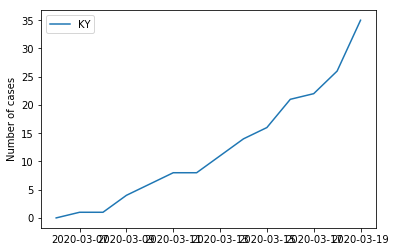

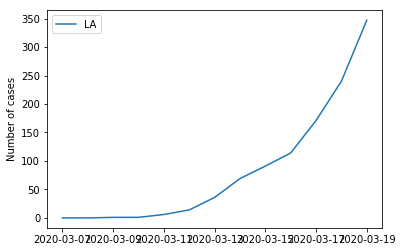

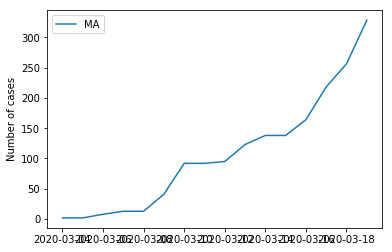

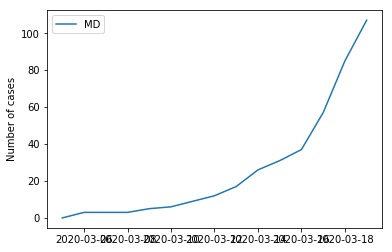

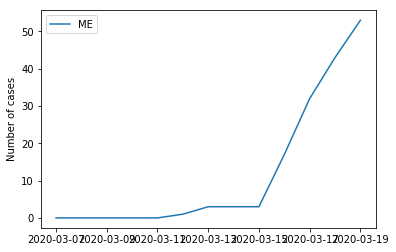

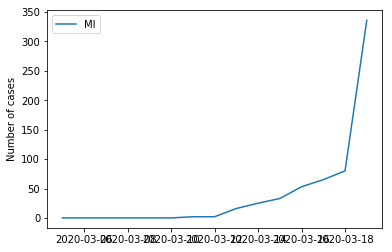

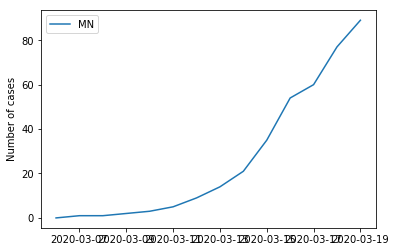

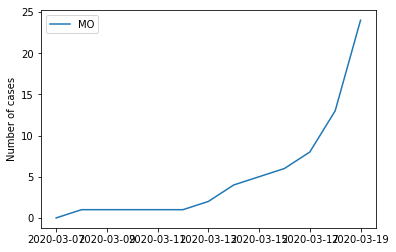

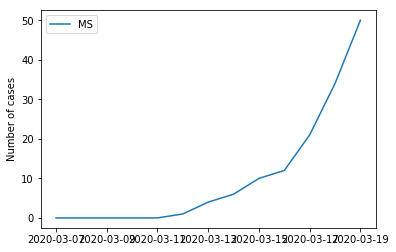

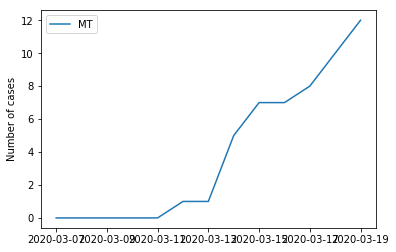

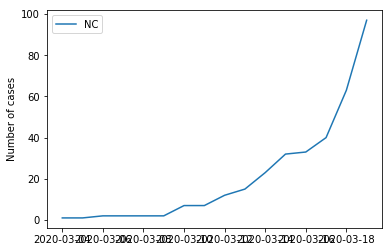

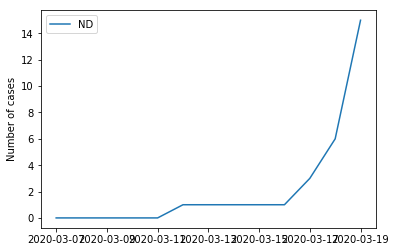

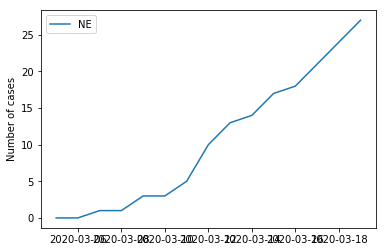

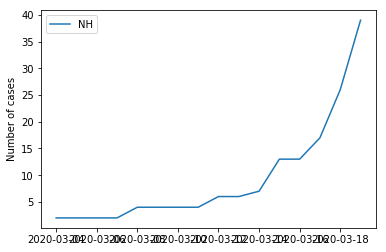

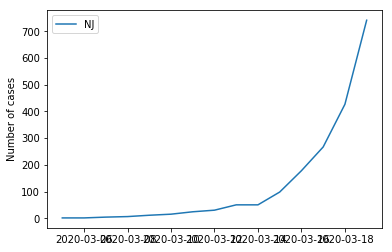

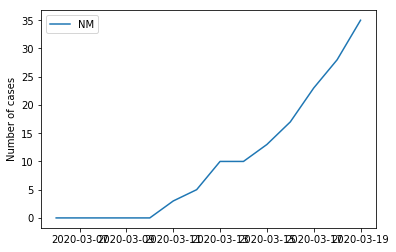

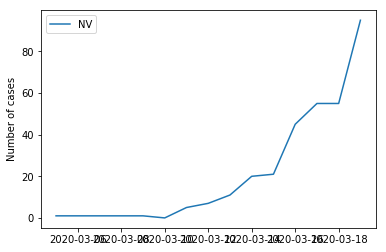

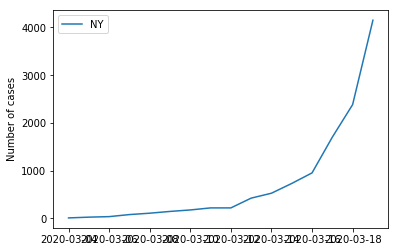

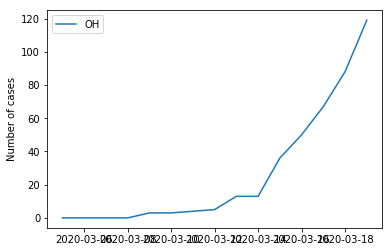

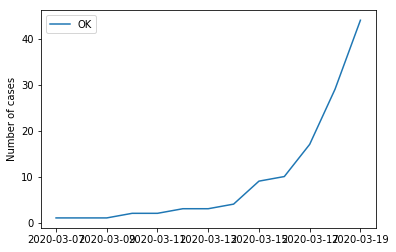

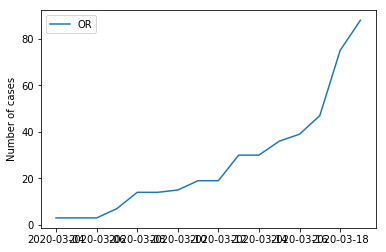

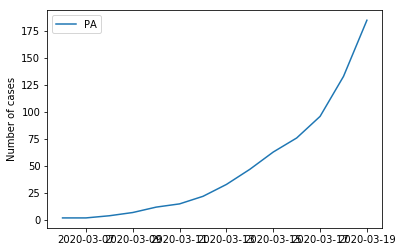

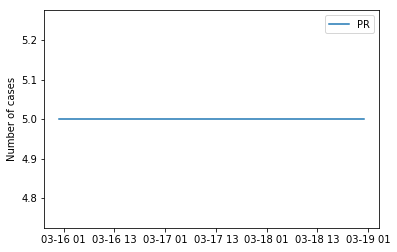

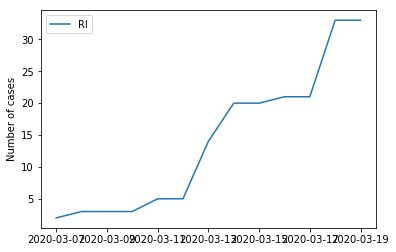

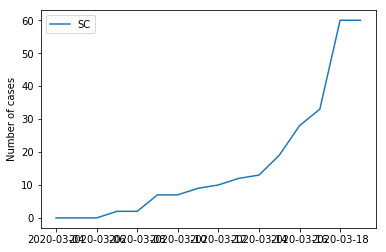

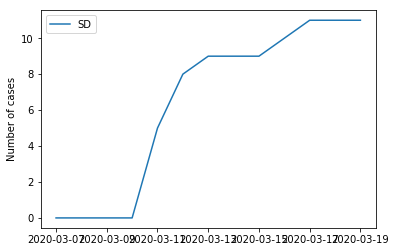

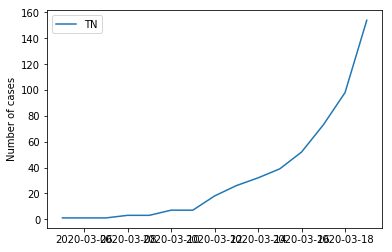

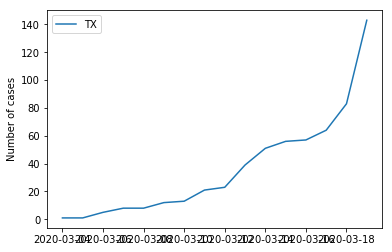

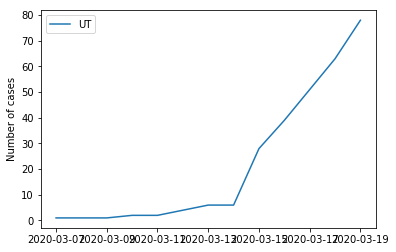

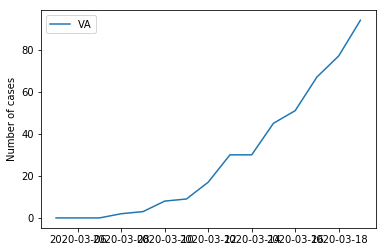

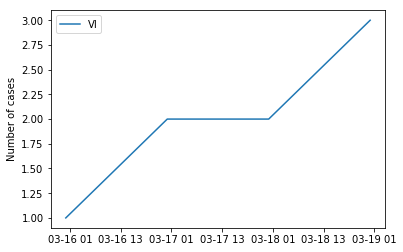

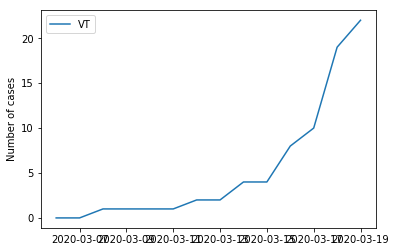

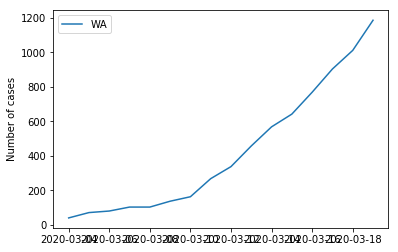

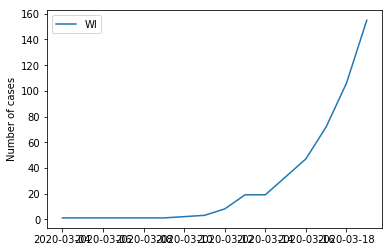

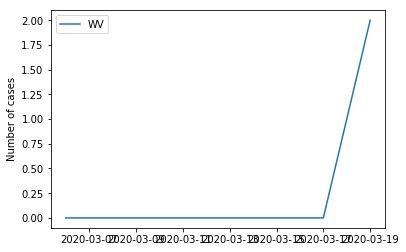

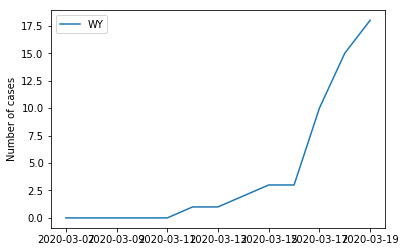

In [66]:
state_list = states['state']
fig, ax = plt.subplots()
for state in state_list:
    S =daily[daily['state'] == state]
    
    plt.plot(S['date'],S['positive'])#,S['date'],S['negative'],S['date'],S['total'])
    plt.ylabel('Number of cases')
    every_nth = 2
    for n, label in enumerate(ax.xaxis.get_ticklabels()):
        if n % every_nth != 0:
            label.set_visible(False)
    plt.legend([state])
    plt.show()

Pull out a specific state

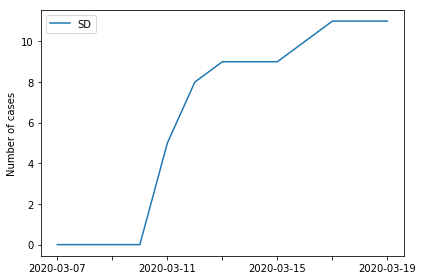

In [101]:
state_list = states['state']
fig, ax = plt.subplots()
S =daily[daily['state'] == 'SD']

plt.plot(S['date'],S['positive'])#,S['date'],S['negative'],S['date'],S['total'])
plt.ylabel('Number of cases')
every_nth = 2
for n, label in enumerate(ax.xaxis.get_ticklabels()):
    if n % every_nth != 0:
        label.set_visible(False)
plt.legend(['SD'])
plt.tight_layout()
plt.show()
